In [18]:
import pandas as pd

In [19]:
train_data = pd.read_csv('../dataset/train.csv')

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312358 entries, 0 to 4312357
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         int64  
 1   id           int64  
 2   type         int64  
 3   temperature  float64
 4   target       float64
dtypes: float64(2), int64(3)
memory usage: 164.5 MB


In [21]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H')
train_data.drop(['type', 'temperature'], axis=1, inplace=True)

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312358 entries, 0 to 4312357
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   id      int64         
 2   target  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 98.7 MB


In [23]:
train_data.describe()

,id,target
count,4.312358e+06,4.312358e+06
mean,2.490000e+02,2.334822e+00
std,1.440486e+02,1.207774e+02
min,0.000000e+00,0.000000e+00
25%,1.240000e+02,7.100000e-02
50%,2.490000e+02,2.120000e-01
75%,3.740000e+02,6.480000e-01
max,4.980000e+02,3.500000e+04


In [43]:
import matplotlib.pyplot as plt


daily_usage = train_data.groupby([train_data['date'].dt.date, 'id'])['target'].sum().reset_index()



In [45]:
daily_usage['date'] = pd.to_datetime(daily_usage['date'])
daily_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179640 entries, 0 to 179639
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    179640 non-null  datetime64[ns]
 1   id      179640 non-null  int64         
 2   target  179640 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.1 MB


In [46]:
daily_usage.head()

,date,id,target
0,2019-01-01,0,2.573
1,2019-01-01,1,2.877
2,2019-01-01,2,22.383
3,2019-01-01,3,10.388
4,2019-01-01,4,13.938


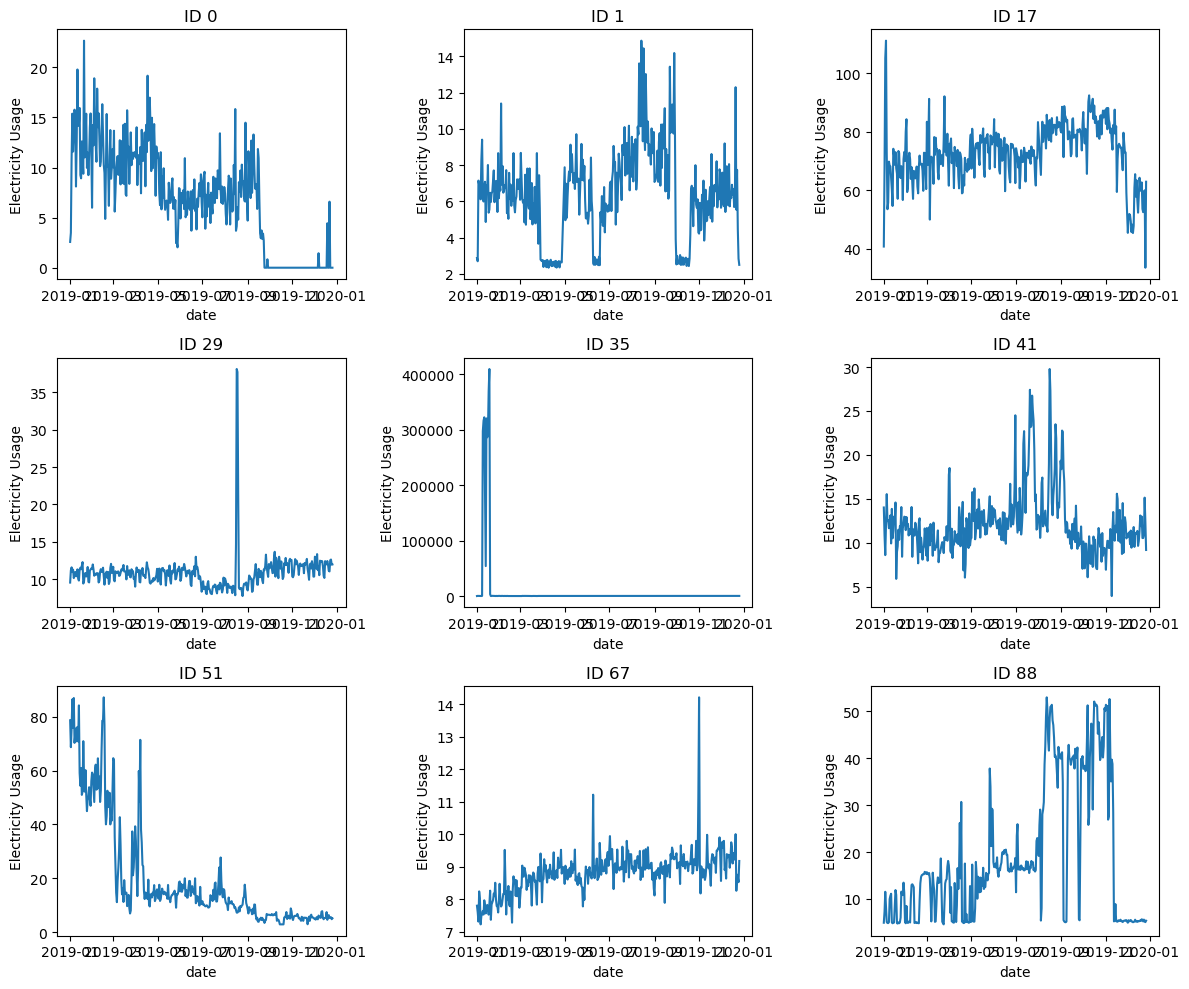

In [56]:
import matplotlib.pyplot as plt


grouped = daily_usage.groupby('id')

# List of IDs to plot
desired_ids = [0, 1, 17, 29, 35, 41, 51, 67, 88]  # Replace with the IDs you want to plot

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Iterate over desired IDs and plot the daily usage trend for each ID
for i, desired_id in enumerate(desired_ids):
    group = grouped.get_group(desired_id)
    
    # Determine the subplot coordinates
    row = i // 3
    col = i % 3
    
    # Plot the daily electricity usage trend for the current ID in the corresponding subplot
    axes[row, col].plot(group['date'], group['target'])
    axes[row, col].set_xlabel('date')
    axes[row, col].set_ylabel('Electricity Usage')
    axes[row, col].set_title(f'ID {desired_id}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()